In [6]:
# load packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model, metrics, feature_extraction

import pandas as pd
df = pd.read_csv('time.csv')
df

,date,hour,pm2.5,DEWP,TEMP,PRES,Iws,Is,Ir,cbwd_NE,cbwd_NW,cbwd_SE,cbwd_cv,Previous_24_hours_average,Previous_week_average
0,2010-01-02,0,129,-16,-4.0,1020.0,1.79,0,0,0,0,1,0,NaN,NaN
1,2010-01-02,1,148,-15,-4.0,1020.0,2.68,0,0,0,0,1,0,NaN,NaN
2,2010-01-02,2,159,-11,-5.0,1021.0,3.57,0,0,0,0,1,0,NaN,NaN
3,2010-01-02,3,181,-7,-5.0,1022.0,5.36,1,0,0,0,1,0,NaN,NaN
4,2010-01-02,4,138,-7,-5.0,1022.0,6.25,2,0,0,0,1,0,NaN,NaN
5,2010-01-02,5,109,-7,-6.0,1022.0,7.14,3,0,0,0,1,0,NaN,NaN
6,2010-01-02,6,105,-7,-6.0,1023.0,8.93,4,0,0,0,1,0,NaN,NaN
7,2010-01-02,7,124,-7,-5.0,1024.0,10.72,0,0,0,0,1,0,NaN,NaN
8,2010-01-02,8,120,-8,-6.0,1024.0,12.51,0,0,0,0,1,0,NaN,NaN
9,2010-01-02,9,132,-7,-5.0,1025.0,14.30,0,0,0,0,1,0,NaN,NaN


In [7]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
plt.rcParams["figure.figsize"] = [16,9]

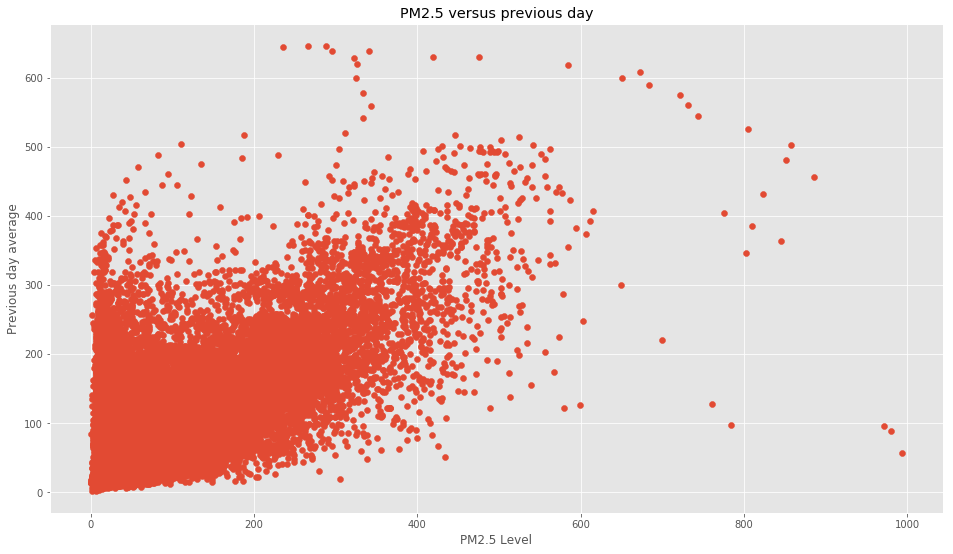

In [8]:
# plot features
x = df['pm2.5']
y = df['Previous_24_hours_average']

plt.scatter(x, y)
plt.xlabel('PM2.5 Level')
plt.ylabel('Previous day average')
plt.title('PM2.5 versus previous day')
plt.show()

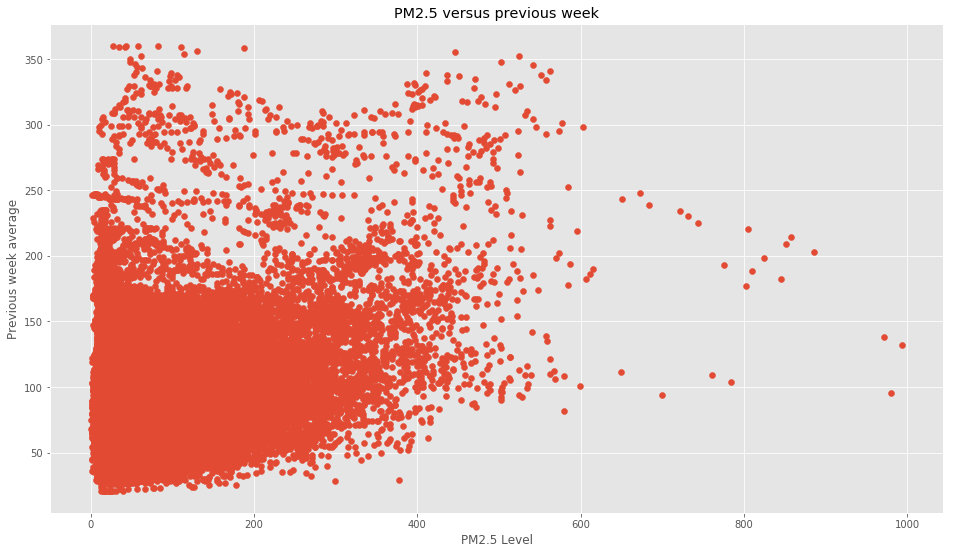

In [9]:
# plot features
x = df['pm2.5']
y = df['Previous_week_average']

plt.scatter(x, y)
plt.xlabel('PM2.5 Level')
plt.ylabel('Previous week average')
plt.title('PM2.5 versus previous week')
plt.show()

## Convert data

In [10]:
# break down date information
df['date'] = pd.to_datetime(df['date'])
df['day'] = df.date.dt.day
df['month'] = df.date.dt.month
df['week of year'] = df['date'].dt.strftime('%U')
df = df.dropna(axis=0,how='any')
df

,date,hour,pm2.5,DEWP,TEMP,PRES,Iws,Is,Ir,cbwd_NE,cbwd_NW,cbwd_SE,cbwd_cv,Previous_24_hours_average,Previous_week_average,day,month,week of year
144,2010-01-09,0,165,-17,-13.0,1027.0,0.89,0,0,0,0,0,1,176.0,88.0,9,1,01
145,2010-01-09,1,159,-17,-13.0,1027.0,3.13,0,0,0,1,0,0,174.0,88.0,9,1,01
146,2010-01-09,2,167,-17,-14.0,1027.0,4.92,0,0,0,1,0,0,172.0,88.0,9,1,01
147,2010-01-09,3,196,-17,-15.0,1027.0,8.05,0,0,0,1,0,0,168.0,88.0,9,1,01
148,2010-01-09,4,169,-17,-13.0,1027.0,9.84,0,0,0,1,0,0,169.0,89.0,9,1,01
149,2010-01-09,5,155,-19,-16.0,1027.0,13.86,0,0,0,1,0,0,172.0,89.0,9,1,01
150,2010-01-09,6,119,-18,-15.0,1027.0,17.88,0,0,0,1,0,0,174.0,89.0,9,1,01
151,2010-01-09,7,106,-19,-15.0,1027.0,21.90,0,0,0,1,0,0,176.0,89.0,9,1,01
152,2010-01-09,8,93,-18,-14.0,1028.0,25.92,0,0,0,1,0,0,177.0,89.0,9,1,01
153,2010-01-09,9,84,-18,-9.0,1029.0,5.81,0,0,1,0,0,0,178.0,89.0,9,1,01


In [11]:
df.dtypes

date                         datetime64[ns]
hour                                  int64
pm2.5                                 int64
DEWP                                  int64
TEMP                                float64
PRES                                float64
Iws                                 float64
Is                                    int64
Ir                                    int64
cbwd_NE                               int64
cbwd_NW                               int64
cbwd_SE                               int64
cbwd_cv                               int64
Previous_24_hours_average           float64
Previous_week_average               float64
day                                   int64
month                                 int64
week of year                         object
dtype: object

## Split into train & test

In [12]:
y = df['pm2.5']
X = df.drop(['pm2.5','date'], axis=1)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=1)

In [13]:
X_train.shape, y_train.shape

((24921, 16), (24921,))

In [14]:
X_test.shape, y_test.shape

((10681, 16), (10681,))

In [15]:
X.columns

Index(['hour', 'DEWP', 'TEMP', 'PRES', 'Iws', 'Is', 'Ir', 'cbwd_NE', 'cbwd_NW',
       'cbwd_SE', 'cbwd_cv', 'Previous_24_hours_average',
       'Previous_week_average', 'day', 'month', 'week of year'],
      dtype='object')

## Implement algorithms

## Decision forest regression

In [16]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


# Create Random Forrest Regressor object
regr_rf = RandomForestRegressor(n_estimators=200, random_state=1)

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [17]:
# Train the model using the training sets
regr_rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
           oob_score=False, random_state=1, verbose=0, warm_start=False)

In [18]:
# Score the model
decision_forest_score = regr_rf.score(X_test, y_test)
decision_forest_score

0.828498761462251

In [19]:
# Make predictions using the testing set
regr_rf_pred = regr_rf.predict(X_test)

In [20]:
from math import sqrt
# The mean squared error
print("Root mean squared error: %.2f"
      % sqrt(mean_squared_error(y_test, regr_rf_pred)))
# The absolute squared error
print("Mean absolute error: %.2f"
      % mean_absolute_error(y_test, regr_rf_pred))
# Explained variance score: 1 is perfect prediction
print('R-squared: %.2f' % r2_score(y_test, regr_rf_pred))

Root mean squared error: 37.66
Mean absolute error: 23.58
R-squared: 0.83


In [21]:
X.columns

Index(['hour', 'DEWP', 'TEMP', 'PRES', 'Iws', 'Is', 'Ir', 'cbwd_NE', 'cbwd_NW',
       'cbwd_SE', 'cbwd_cv', 'Previous_24_hours_average',
       'Previous_week_average', 'day', 'month', 'week of year'],
      dtype='object')

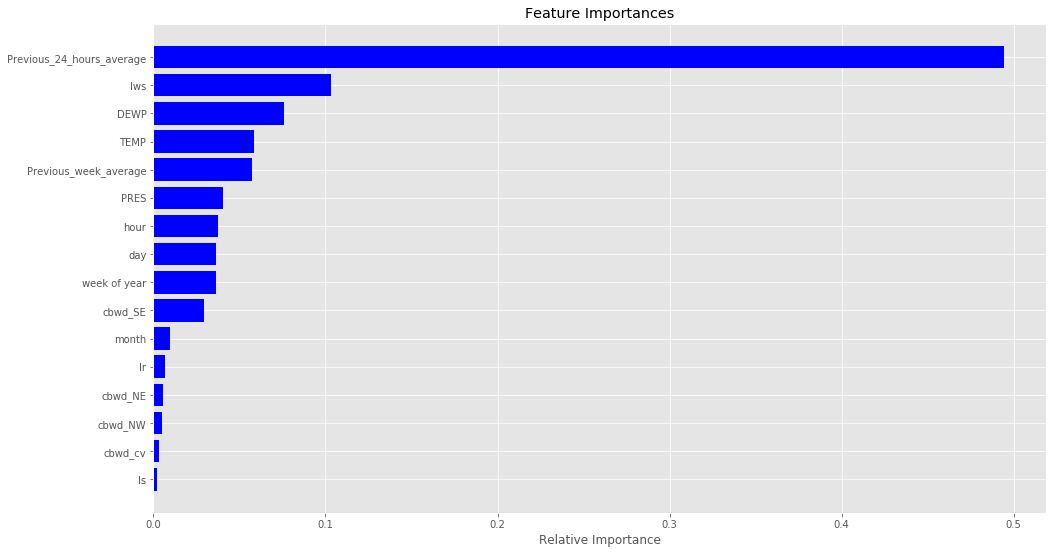

In [22]:
features = X.columns
importances = regr_rf.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')
plt.show()

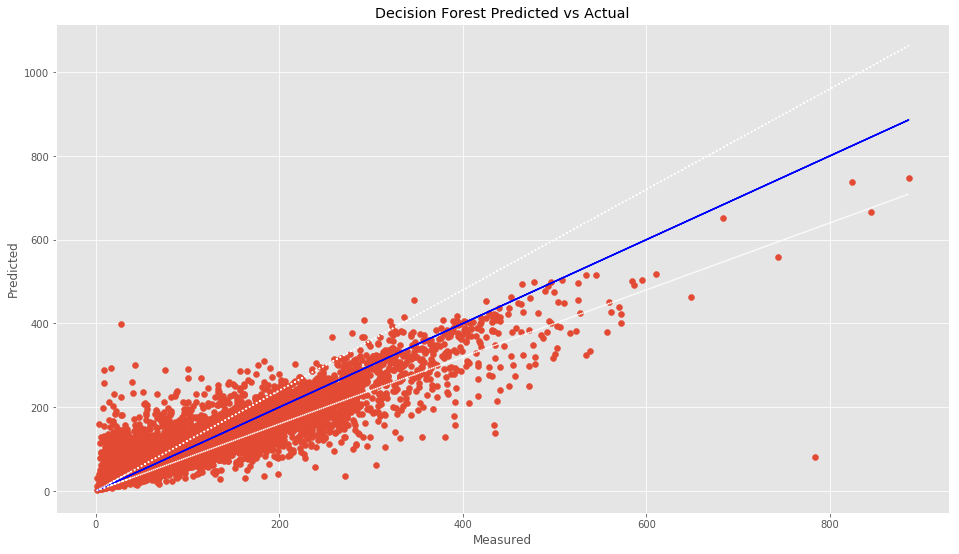

In [24]:
plt.scatter(y_test, regr_rf_pred)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title('Decision Forest Predicted vs Actual')
x = y_test
y = x
plt.plot(x, y, '-b', )
plt.plot(x, 1.2*y,':w',)
plt.plot(x, 0.8*y,':w',)
plt.show()

## Extra Trees Regression

In [25]:
from sklearn.ensemble import ExtraTreesRegressor

extra_tree = ExtraTreesRegressor(n_estimators=200, random_state=1)

In [26]:
extra_tree.fit(X_train, y_train)

ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=None,
          max_features='auto', max_leaf_nodes=None,
          min_impurity_decrease=0.0, min_impurity_split=None,
          min_samples_leaf=1, min_samples_split=2,
          min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
          oob_score=False, random_state=1, verbose=0, warm_start=False)

In [75]:
extratree_score = extra_tree.score(X_test, y_test)
extratree_score

0.8348129678808192

In [27]:
extratree_pred = extra_tree.predict(X_test)
print("Root mean squared error: %.2f"
      % sqrt(mean_squared_error(y_test, extratree_pred)))

Root mean squared error: 36.97


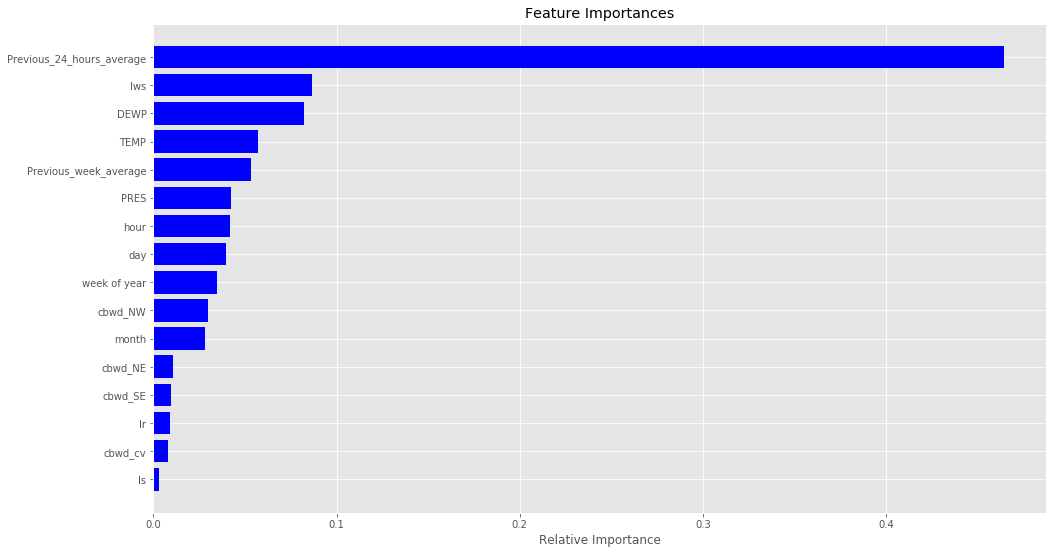

In [28]:
features = X.columns
importances = extra_tree.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')
plt.show()

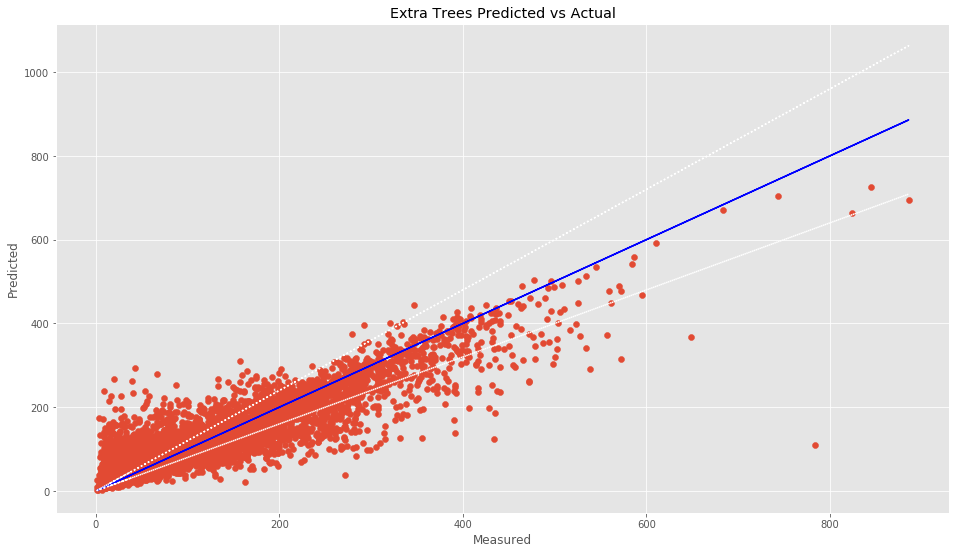

In [30]:
plt.scatter(y_test, extratree_pred)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title('Extra Trees Predicted vs Actual')
x = y_test
y = x
plt.plot(x, y, '-b', )
plt.plot(x, 1.2*y,':w',)
plt.plot(x, 0.8*y,':w',)
plt.show()

## Decision Tree + AdaBoost

In [31]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Create Decision Tree Regressor object
tree_1 = DecisionTreeRegressor()

tree_2 = AdaBoostRegressor(DecisionTreeRegressor(), n_estimators=200, learning_rate=.1)

In [32]:
# Train the model using the training sets
tree_1.fit(X_train, y_train)
tree_2.fit(X_train, y_train)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
         learning_rate=0.1, loss='linear', n_estimators=200,
         random_state=None)

In [33]:
# Score the decision tree model
tree_1.score(X_test, y_test)

0.6296288885249244

In [34]:
# Score the boosted decision tree model
boosted_tree_score = tree_2.score(X_test, y_test)
boosted_tree_score

0.8568707015512965

In [35]:
# Make predictions using the testing set
tree_1_pred = tree_1.predict(X_test)
tree_2_pred = tree_2.predict(X_test)

In [36]:
# The mean squared error
print("Root mean squared error: %.2f"
      % sqrt(mean_squared_error(y_test, tree_2_pred)))
# The absolute squared error
print("Mean absolute error: %.2f"
      % mean_absolute_error(y_test, tree_2_pred))
# Explained variance score: 1 is perfect prediction
print('R-squared: %.2f' % r2_score(y_test, tree_2_pred))

Root mean squared error: 34.41
Mean absolute error: 18.70
R-squared: 0.86


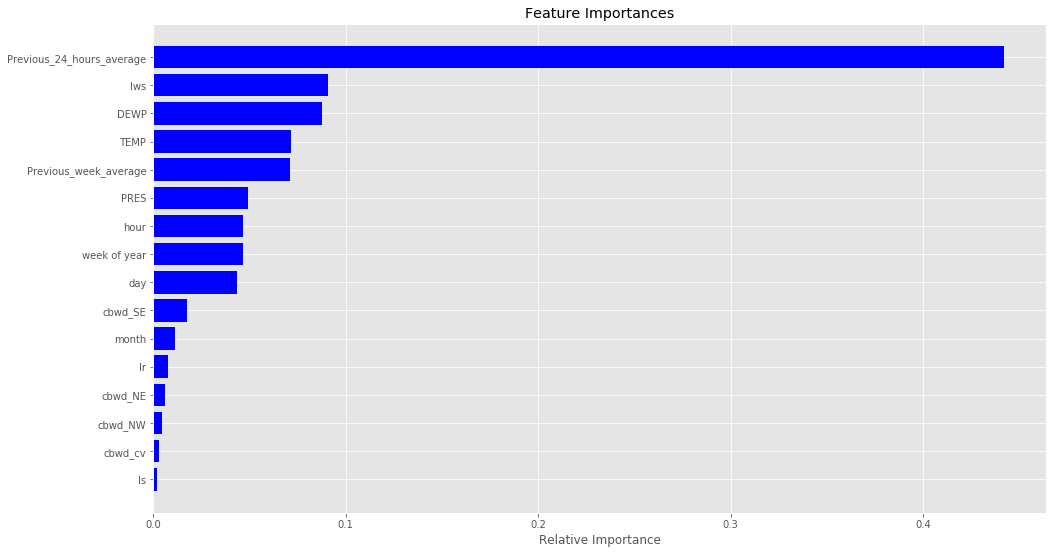

In [37]:
features = X.columns
importances = tree_2.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')
plt.show()

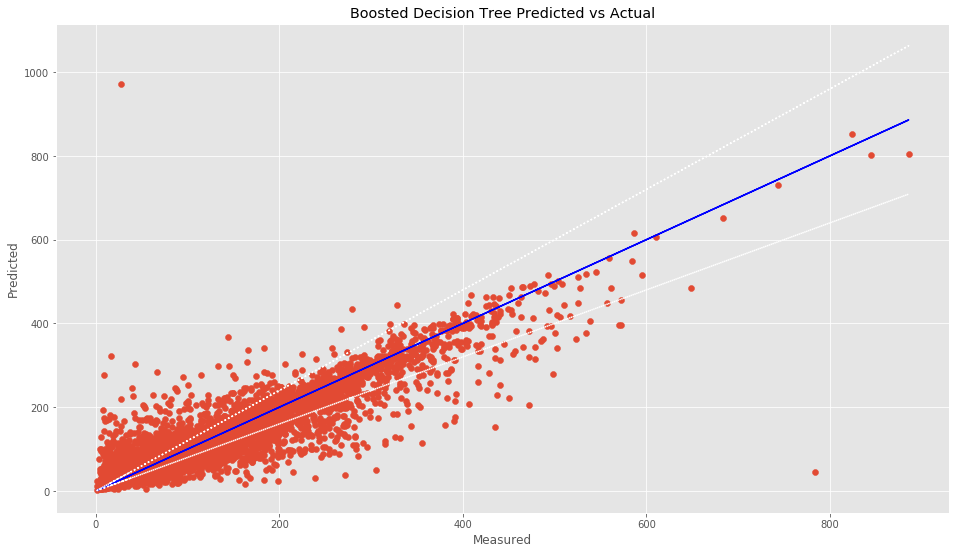

In [38]:
plt.scatter(y_test, tree_2_pred)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title('Boosted Decision Tree Predicted vs Actual')
x = y_test
y = x
plt.plot(x, y, '-b', )
plt.plot(x, 1.2*y,':w',)
plt.plot(x, 0.8*y,':w',)
plt.show()

In [89]:
print("Scores:")
print("Decision forest score: ", decision_forest_score)
print("Extra Trees score: ", extratree_score)
print("Boosted decision tree score: ", boosted_tree_score)
print("\n")
print("RMSE:")
print("Decision forest RMSE: %.2f"
      % sqrt(mean_squared_error(y_test, regr_rf_pred)))
print("Extra Trees RMSE: %.2f"
      % sqrt(mean_squared_error(y_test, extratree_pred)))
print("Boosted decision tree RMSE: %.2f"
      % sqrt(mean_squared_error(y_test, tree_2_pred)))

Scores:
Decision forest score:  0.828498761462251
Extra Trees score:  0.8348129678808192
Boosted decision tree score:  0.8672956439103332


RMSE:
Decision forest RMSE: 37.66
Extra Trees RMSE: 36.97
Boosted decision tree RMSE: 33.13
